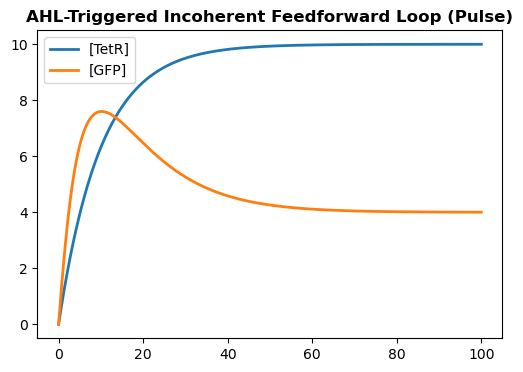

In [1]:
import tellurium as te

model = te.loada("""
model IFFL_AHL_TetR
// Species
AHL = 10;
TetR = 0;
GFP = 0;
                 
// Parameters
k1 = 0.1; // AHL activates TetR (slow)
k2 = 0.2; // AHL activates GFP (fast)
k3 = 1.0;// TetR represses GFP
K = 5; // Repression Threshold (TetR)
n = 2; // Hill coefficient
k_deg_tet = 0.1; // TetR degradation
k_deg_GFP = 0.1; // GFP degradation
                 
// Reactions
J1: -> TetR; k1*AHL // AHL makes TetR
J2: TetR -> ; k_deg_tet*TetR
J3: -> GFP ; k2*AHL/(1+(TetR/K)^n) // GFP made repressed by TetR
J4: GFP -> ; k_deg_GFP*GFP
end
""")

model.simulate(0, 100, 1000)
model.plot(title="AHL-Triggered Incoherent Feedforward Loop (Pulse)")